# 準備

## Googleドライブのマウント

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## sys.pathの設定

以下では，Googleドライブのマイドライブ直下にDNN_codeフォルダを置くことを仮定しています．必要に応じて，パスを変更してください．

In [33]:
import sys
sys.path.append('/content/drive/My Drive/DNN_code')
sys.path.append('/content/drive/My Drive/DNN_code/lesson_2')

# overfiting

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.15666666666666668
                : 10. 正答率(テスト) = 0.1445
Generation: 20. 正答率(トレーニング) = 0.21
                : 20. 正答率(テスト) = 0.1774
Generation: 30. 正答率(トレーニング) = 0.3233333333333333
                : 30. 正答率(テスト) = 0.2284
Generation: 40. 正答率(トレーニング) = 0.43333333333333335
                : 40. 正答率(テスト) = 0.2968
Generation: 50. 正答率(トレーニング) = 0.47333333333333333
                : 50. 正答率(テスト) = 0.3358
Generation: 60. 正答率(トレーニング) = 0.52
                : 60. 正答率(テスト) = 0.3813
Generation: 70. 正答率(トレーニング) = 0.57
                : 70. 正答率(テスト) = 0.437
Generation: 80. 正答率(トレーニング) = 0.7
                : 80. 正答率(テスト) = 0.5211
Generation: 90. 正答率(トレーニング) = 0.7566666666666667
                : 90. 正答率(テスト) = 0.5753
Generation: 100. 正答率(トレーニング) = 0.7733333333333333
                : 100. 正答率(テスト) = 0.5919
Generation: 110. 正答率(トレーニング) = 0.8166666666666667
                : 110. 正答率(テスト) = 0.6146
Generation: 120. 正答率(トレーニング) = 0.8433333333333334
            

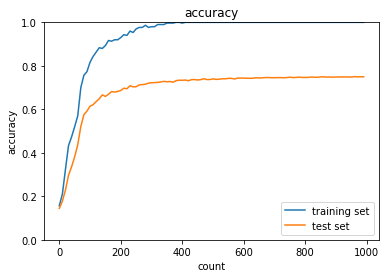

In [34]:
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet
from common import optimizer


(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = optimizer.SGD(learning_rate=0.01)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## weight decay
### L2

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.22666666666666666
                : 10. 正答率(テスト) = 0.1769
Generation: 20. 正答率(トレーニング) = 0.2866666666666667
                : 20. 正答率(テスト) = 0.2123
Generation: 30. 正答率(トレーニング) = 0.31333333333333335
                : 30. 正答率(テスト) = 0.2412
Generation: 40. 正答率(トレーニング) = 0.33666666666666667
                : 40. 正答率(テスト) = 0.2612
Generation: 50. 正答率(トレーニング) = 0.3433333333333333
                : 50. 正答率(テスト) = 0.2785
Generation: 60. 正答率(トレーニング) = 0.37333333333333335
                : 60. 正答率(テスト) = 0.2943
Generation: 70. 正答率(トレーニング) = 0.4
                : 70. 正答率(テスト) = 0.3125
Generation: 80. 正答率(トレーニング) = 0.4
                : 80. 正答率(テスト) = 0.3252
Generation: 90. 正答率(トレーニング) = 0.39666666666666667
                : 90. 正答率(テスト) = 0.3235
Generation: 100. 正答率(トレーニング) = 0.3933333333333333
                : 100. 正答率(テスト) = 0.3295
Generation: 110. 正答率(トレーニング) = 0.39666666666666667
                : 110. 正答率(テスト) = 0.3319
Generation: 120. 正答率(トレーニング) = 

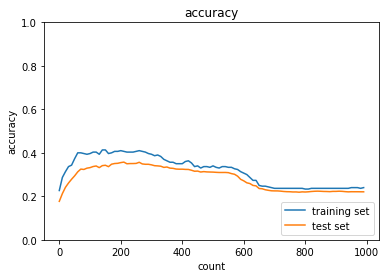

In [37]:
from common import optimizer

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]


network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.2
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * network.params['W' + str(idx)]
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += 0.5 * weight_decay_lambda * np.sqrt(np.sum(network.params['W' + str(idx)] ** 2))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

### L1

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.51
                : 10. 正答率(テスト) = 0.4011
Generation: 20. 正答率(トレーニング) = 0.6
                : 20. 正答率(テスト) = 0.4613
Generation: 30. 正答率(トレーニング) = 0.7333333333333333
                : 30. 正答率(テスト) = 0.5837
Generation: 40. 正答率(トレーニング) = 0.6266666666666667
                : 40. 正答率(テスト) = 0.4899
Generation: 50. 正答率(トレーニング) = 0.7633333333333333
                : 50. 正答率(テスト) = 0.6217
Generation: 60. 正答率(トレーニング) = 0.5966666666666667
                : 60. 正答率(テスト) = 0.4914
Generation: 70. 正答率(トレーニング) = 0.6833333333333333
                : 70. 正答率(テスト) = 0.5623
Generation: 80. 正答率(トレーニング) = 0.49666666666666665
                : 80. 正答率(テスト) = 0.4137
Generation: 90. 正答率(トレーニング) = 0.5466666666666666
                : 90. 正答率(テスト) = 0.4185
Generation: 100. 正答率(トレーニング) = 0.5766666666666667
                : 100. 正答率(テスト) = 0.4872
Generation: 110. 正答率(トレーニング) = 0.6
                : 110. 正答率(テスト) = 0.4819
Generation: 120. 正答率(トレーニング) = 0.30666666666666664

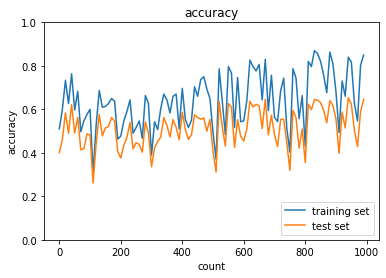

In [40]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.01
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
                
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------
## [try] weigth_decay_lambdaの値を変更して正則化の強さを確認しよう
----------------------------------------------------------------------------------------------------------------------------------------

L1, L2ともに値を大きくすると正則化が強くなることが確認できる。

*  **L1**
> weight_decay_lambda = 0.005
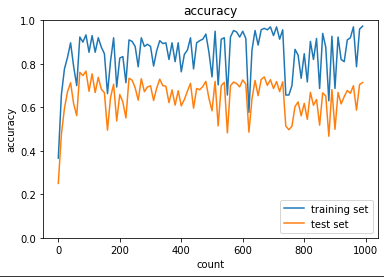
> weight_decay_lambda = 0.02
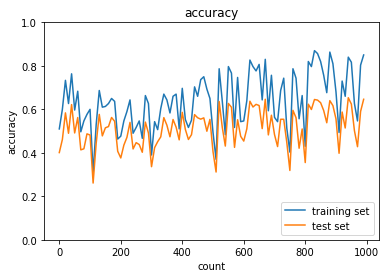


*  **L2**
> weight_decay_lambda = 0.1
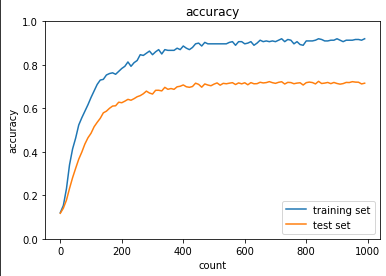
> weight_decay_lambda = 0.2
 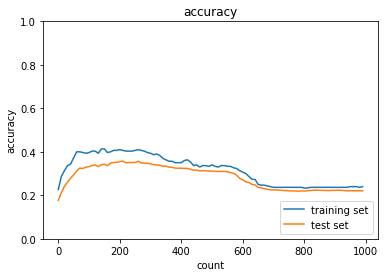

## Dropout

In [41]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.13666666666666666
                : 10. 正答率(テスト) = 0.1109
Generation: 20. 正答率(トレーニング) = 0.37
                : 20. 正答率(テスト) = 0.2776
Generation: 30. 正答率(トレーニング) = 0.49666666666666665
                : 30. 正答率(テスト) = 0.4092
Generation: 40. 正答率(トレーニング) = 0.6466666666666666
                : 40. 正答率(テスト) = 0.5193
Generation: 50. 正答率(トレーニング) = 0.6633333333333333
                : 50. 正答率(テスト) = 0.5545
Generation: 60. 正答率(トレーニング) = 0.81
                : 60. 正答率(テスト) = 0.6773
Generation: 70. 正答率(トレーニング) = 0.85
                : 70. 正答率(テスト) = 0.698
Generation: 80. 正答率(トレーニング) = 0.88
                : 80. 正答率(テスト) = 0.7077
Generation: 90. 正答率(トレーニング) = 0.9233333333333333
                : 90. 正答率(テスト) = 0.7263
Generation: 100. 正答率(トレーニング) = 0.9466666666666667
                : 100. 正答率(テスト) = 0.7448
Generation: 110. 正答率(トレーニング) = 0.9633333333333334
                : 110. 正答率(テスト) = 0.7642
Generation: 120. 正答率(トレーニング) = 0.9733333333333334
            

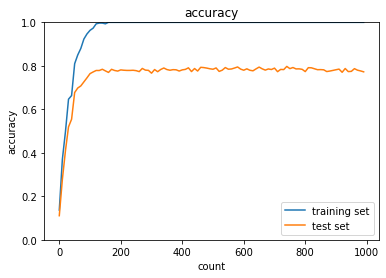

In [47]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.15
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
# optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------------------------------
## [try] dropout_ratioの値を変更してみよう




*   dropout_ratio=0.15<br>
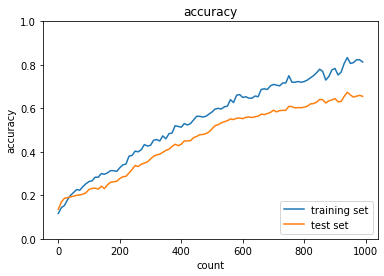

*   dropout_ratio=0.30<br>
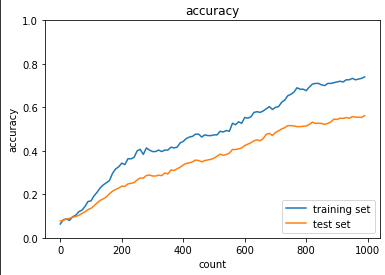



## [try] optimizerとdropout_ratioの値を変更してみよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------

*   optimizer=SGD, dropout_ratio=0.15<br>
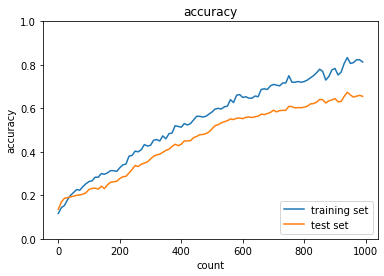

*   optimizer=Momentum, dropout_ratio=0.15<br>
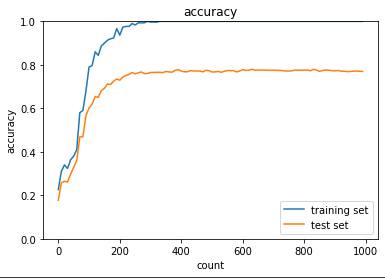

*   optimizer=AdaGrad, dropout_ratio=0.15<br>
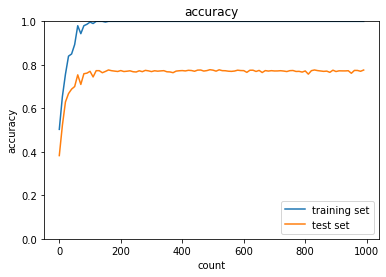

*   optimizer=Adam, dropout_ratio=0.15<br>
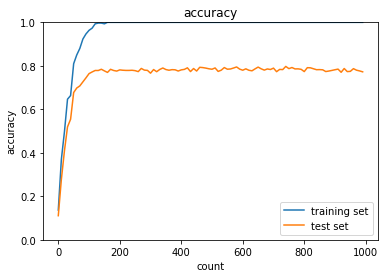

## Dropout + L1

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.1
                : 10. 正答率(テスト) = 0.114
Generation: 20. 正答率(トレーニング) = 0.13333333333333333
                : 20. 正答率(テスト) = 0.1368
Generation: 30. 正答率(トレーニング) = 0.19333333333333333
                : 30. 正答率(テスト) = 0.1731
Generation: 40. 正答率(トレーニング) = 0.24333333333333335
                : 40. 正答率(テスト) = 0.206
Generation: 50. 正答率(トレーニング) = 0.29
                : 50. 正答率(テスト) = 0.2493
Generation: 60. 正答率(トレーニング) = 0.31
                : 60. 正答率(テスト) = 0.2706
Generation: 70. 正答率(トレーニング) = 0.34
                : 70. 正答率(テスト) = 0.2961
Generation: 80. 正答率(トレーニング) = 0.35333333333333333
                : 80. 正答率(テスト) = 0.3049
Generation: 90. 正答率(トレーニング) = 0.37333333333333335
                : 90. 正答率(テスト) = 0.3135
Generation: 100. 正答率(トレーニング) = 0.39
                : 100. 正答率(テスト) = 0.3196
Generation: 110. 正答率(トレーニング) = 0.38
                : 110. 正答率(テスト) = 0.3255
Generation: 120. 正答率(トレーニング) = 0.37666666666666665
                : 120. 正答率(テスト) = 0.32

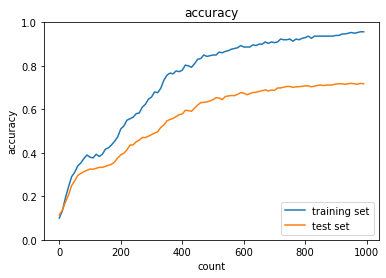

In [48]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.08
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        use_dropout = use_dropout, dropout_ratio = dropout_ratio)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []
hidden_layer_num = network.hidden_layer_num

plot_interval=10

# 正則化強度設定 ======================================
weight_decay_lambda=0.004
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()